# Исследование рынка видеоигр для разработки рекламной компании

### Цель исследования:

Выявить закономерности на рынке видеоигр на основе данных из открытых источников. 

### Ход исследования:

 - Предобработка данных
 - Исследовательский ангализ данных:
 - Проверка гипотез
 
### Языки и библиотеки:

Python (pandas, matplotib, seaborn, numpy, stats)

### Вывод:

- средний срок жизни игровых платворм (за исключением PC) составляет 10лет. 
- актуальными игровыми платформами на конец изучаемого периода считаются: PS4, XBox One, 3DS, PC. В меньшей степени можно выделить: PS3, XBox 360, т.к. платформы устаревшие.
- самыми популярними жанрами являются Action, shooter, Role-playing, Spotrs, Misc.
- нельзя не отметить что предпочтения игроков в зависимости от регионов разнятся: 
      - В Северной Америке самая популярная платформа - XBox 360; самый популярний жанр - Action
      - В Европе - PS3, Action
      - В Японии - 3DS, Role-playing
- необходимо учитывать возрастной рейтинг: в Северной Америке и Европе активно используется рейтинг  ESRB. Самые продаваемые игры имеют рейтинг 'М' и 'Е' в обоих регионах. В Японии большинство игр не маркоровано данным рейтингом, там используется другая рейтинговая система.
- самый оборачиваемый - рынок Северной америки с долей 42%, на втором месте расположился рынок Европы - 34% и рынок Японии с долей 13% 

    **Были сформулированы и проверены две гипотезы:** 
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Первая гипотеза оказалась верной, вторая - нет. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')

except:
    data = pd.read_csv('D:\\Практикум\\games.csv')

In [62]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


При первом знакомстве с данными брасается в глаза количество ненулевых строк. Скорее всего это сидетельствует о наличии пропусков в данных. Также можно заметить неподходящие типы данных, например "оценка пользолвателя" - oject. Оцевидно, что должен быть float или int. Далее рассмотрим столбцы более подробно. 

**ПРЕДОБРАБОТКА ДАННЫХ**

In [5]:
# Приведем название столбцов к нижнему регистру: 
data = data.rename(columns={'Name':'name', 
                            'Platform':'platform', 
                            'Year_of_Release': 'year_of_release',
                            'Genre':'genre',
                            'NA_sales':'na_sales',
                            'EU_sales':'eu_sales',
                            'JP_sales':'jp_sales',
                            'Other_sales':'other_sales',
                            'Critic_Score':'critic_score',
                            'User_Score':'user_score',
                            'Rating':'rating'
    
}
                  )

In [6]:
#Провертим на дубликаты: 
data.duplicated().sum()

0

Работа с пропусками:

In [7]:
# Выясним, где присутствуют пропуски и посчитаем их долю от общего числа значений в столбцах: 

data.isna().sum()



name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


In [9]:
# В столбцах имени и жанра есть по 2 пропуска, проверим, совпадают ли эти строки: 

data['name'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Name: name, Length: 16715, dtype: bool

In [10]:
# Пропуски совпадают, удалим эти строки:

data = data.dropna(subset=['name'])

In [11]:
# в столбце с годом релиза всего 2% пропусков, подставлять какие-либо значения в данном случае нелогично. Удалим эти строки:

data = data.dropna(subset=['year_of_release'])

In [12]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [13]:
# Рассмотрим стоблец с оценками пользователей: 

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
# Запись tbd (to be deretmined) в столбце бесполезна для исследования. Заменим на NaN.  

data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [15]:
# Изучим столбец с оценками критиков: 

data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
# с помощью случайной выборки проверим предположение, связаны ли пропуски в оценках игр с давней датой релиза 

data[(data['user_score'].isna()) & data['critic_score'].isna()].sample(n=20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12768,Pheasants Forever Wingshooter,Wii,2010.0,Shooter,0.03,0.02,0.00,0.00,NaN,NaN,T
6670,Wheel of Fortune,N64,1997.0,Misc,0.20,0.05,0.00,0.00,NaN,NaN,NaN
11778,Kenka Banchou 6: Soul & Blood,3DS,2015.0,Fighting,0.00,0.00,0.07,0.00,NaN,NaN,NaN
9328,Bratz,GBA,2002.0,Platform,0.10,0.04,0.00,0.00,NaN,NaN,E
14391,Sea Park Tycoon,DS,2010.0,Simulation,0.02,0.01,0.00,0.00,NaN,NaN,E
2167,Mega Man Star Force Dragon / Leo / Pegasus,DS,2006.0,Action,0.39,0.00,0.53,0.03,NaN,NaN,NaN
14000,Magical Starsign (JP sales),DS,2006.0,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13231,G1 Grand Prix,3DS,2012.0,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN
6949,Mobile Suit Gundam: Climax U.C.,PS2,2006.0,Action,0.00,0.00,0.23,0.00,NaN,NaN,NaN
11076,Detana TwinBee Yahho! Deluxe Pack,PS,1995.0,Shooter,0.00,0.00,0.08,0.01,NaN,NaN,NaN


Зависмости не наблюдается, скорее всего пропуски в данных связаны с источником из которого они были взяты. Т.к. разумно заменить пропущенные значения невозможно, а удалять 40% строк датасата неприемлемо, придется оставить пропуски. Скорее всего похожим образом придется поступить с возрастным рейтингом:  

In [17]:
# Рассмотрим столбец с возратсным рейтингом: 

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
# Рейтинг 'K-A' является старым обозначением рейтинга 'E'. Заменим его на новое обозначение:

data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [19]:
data.query('year_of_release < 1994').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 16207
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             365 non-null    object 
 1   platform         365 non-null    object 
 2   year_of_release  365 non-null    float64
 3   genre            365 non-null    object 
 4   na_sales         365 non-null    float64
 5   eu_sales         365 non-null    float64
 6   jp_sales         365 non-null    float64
 7   other_sales      365 non-null    float64
 8   critic_score     3 non-null      float64
 9   user_score       3 non-null      object 
 10  rating           4 non-null      object 
dtypes: float64(6), object(5)
memory usage: 34.2+ KB


In [20]:
data.query('year_of_release < 1994 and rating.isna()').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 1 to 16207
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             361 non-null    object 
 1   platform         361 non-null    object 
 2   year_of_release  361 non-null    float64
 3   genre            361 non-null    object 
 4   na_sales         361 non-null    float64
 5   eu_sales         361 non-null    float64
 6   jp_sales         361 non-null    float64
 7   other_sales      361 non-null    float64
 8   critic_score     0 non-null      float64
 9   user_score       0 non-null      object 
 10  rating           0 non-null      object 
dtypes: float64(6), object(5)
memory usage: 33.8+ KB


 Организация Entertainment Software Rating Board (ESRB) была основана в 1994 году, логично, что почти все игры, вышедшие раньше не имеют данной класификации. Пропуски для игр младше 1994г можно обяснить тем, что основная деятельность организации разворачивалась в США и Канаде и в меньшей степени касалась остальных стран. Пропуски можно заменить зачением 'no_rating':    

In [21]:
data['rating'] = data['rating'].fillna('no_rating')

In [22]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating


Изменение типов данных в столбцах: 

In [23]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [24]:
data['user_score'] = data['user_score'].astype(float)

Создадим столбец с суммарными продажами по всем регионам:

In [25]:
data['common_sales'] = data['na_sales'] + data['eu_sales'] + data['other_sales'] + data['jp_sales']

In [26]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01


In [27]:
data.query('common_sales <= 0.01')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
15384,Order of War,PC,2009,Strategy,0.00,0.01,0.00,0.0,69.0,7.3,T,0.01
15486,Arslan: The Warriors of Legend,XOne,2016,Action,0.01,0.00,0.00,0.0,NaN,5.8,T,0.01
15499,Motocross Mania 3,XB,2005,Racing,0.01,0.00,0.00,0.0,38.0,3.6,T,0.01
15520,Pump It Up: Exceed,XB,2005,Misc,0.01,0.00,0.00,0.0,74.0,7.5,T,0.01
15542,Digimon Rumble Arena 2,XB,2004,Fighting,0.01,0.00,0.00,0.0,65.0,8.8,T,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,no_rating,0.01


Мы налбюдаем неестественые данные с нулевыми продажами, однако в этих строках, есть другие полезные данные. Оставим их.

**Вывод**:Столбцы датафрейма были приведены к общеприянтому стилю. В данных ожидаемо были пропуски и неточности. Почти все пропуски сконцентрировали в столбцах с оценками пользователей и критиков, а также с возрастным рейтингом. Заменить пропуски с оценками продукта какими-либо значениями было бы некорректно. Пропуски с рейтингом были заменены на 'no-rating', момимо этого в данном столбце были устаревшие наименования: рейтинг К-А, что также было исправлено. в столбцах с датой релиза и оценками пользователей был изменен тип данных для корректной работы с ними. Дубликатов обнаружено не было.    

**ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ**

<AxesSubplot:title={'center':'Распределение кол-ва релизов по датам'}, xlabel='year_of_release'>

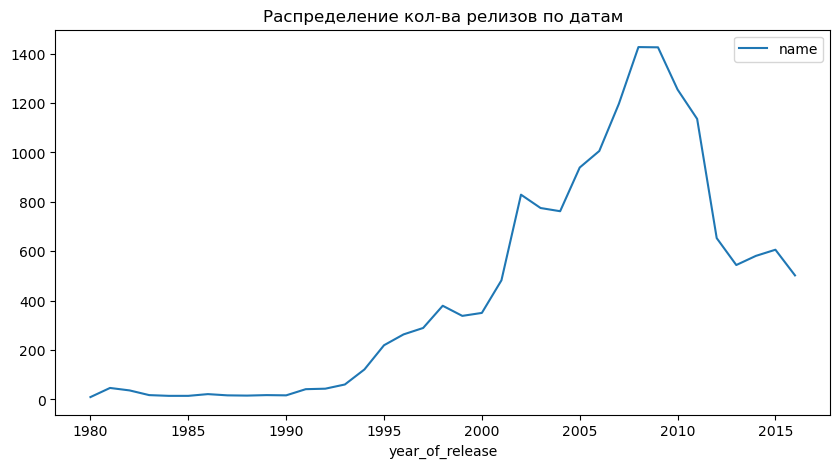

In [28]:
# Изучим распределение количества игр по годам:

data.pivot_table(index='year_of_release', 
                 values='name', 
                 aggfunc='count').\
plot(figsize=(10, 5), title='Распределение кол-ва релизов по датам')


Мы наблюдаем резкий рост релизов с 1993г. до 2007г, затем резкий спад после 2009г. Таким образом, данные до 1993г. не представлят большого интереса для изучения.  

In [29]:
# Рассмотрим распределение суммарных продаж по платформам:

data.groupby('platform')['common_sales'].sum().sort_values(ascending=False)


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: common_sales, dtype: float64

In [30]:
# Создадим датафрейм с топ 11 платформами по продажам игр
top_sales = data.loc[data['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS', 'PC'])]

<AxesSubplot:title={'center':'Распределение продаж игр на топовых платформах по годам'}, xlabel='year_of_release'>

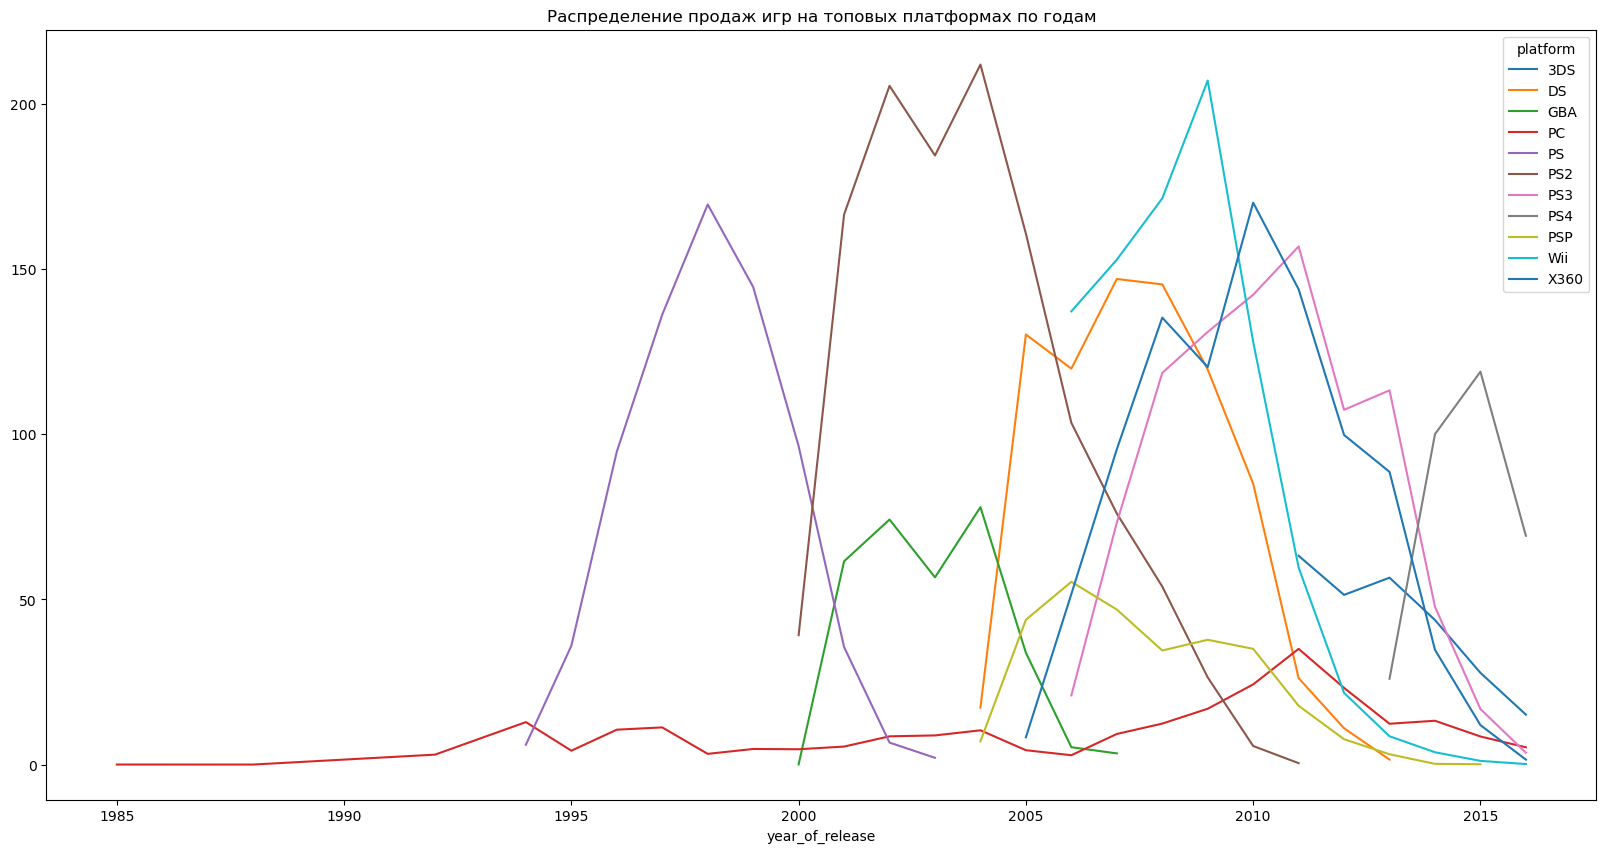

In [31]:
#Посмотрим на распределение продаж от платформ по годам: 

top_sales.pivot_table(index='year_of_release', columns='platform', values='common_sales', aggfunc='sum').plot(figsize=(20, 10), title='Распределение продаж игр на топовых платформах по годам')

Мы наблюдаем, как одни платформы сменяют другие из-за технологического устаревания. Средний срок актуальности игровой платформы 10 лет. Данная закономерность не относится к ПК, т.к. на современные компьютеры поддержиавют более ранние игры. Ввиду сменяемости игровых платформ на момент конца 2016го года некоторые из них больше не представляют интереса, поэтому актуальным будем счтать период игровых релизов с 2011 по 2016г.   

In [32]:
# Создадим обновленный датафрейм с актуальными данными для изучения: 

data_modern = data.query('year_of_release >= 2011')

In [33]:
# Выясним, какие платформы формируют топ продаж игр в выбранном актуальном периоде: 

data_modern.groupby('platform')['common_sales'].sum().sort_values(ascending=False)

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: common_sales, dtype: float64

<AxesSubplot:title={'center':'Топ 7 платформ по продажам игр за актуальный период'}, xlabel='year_of_release'>

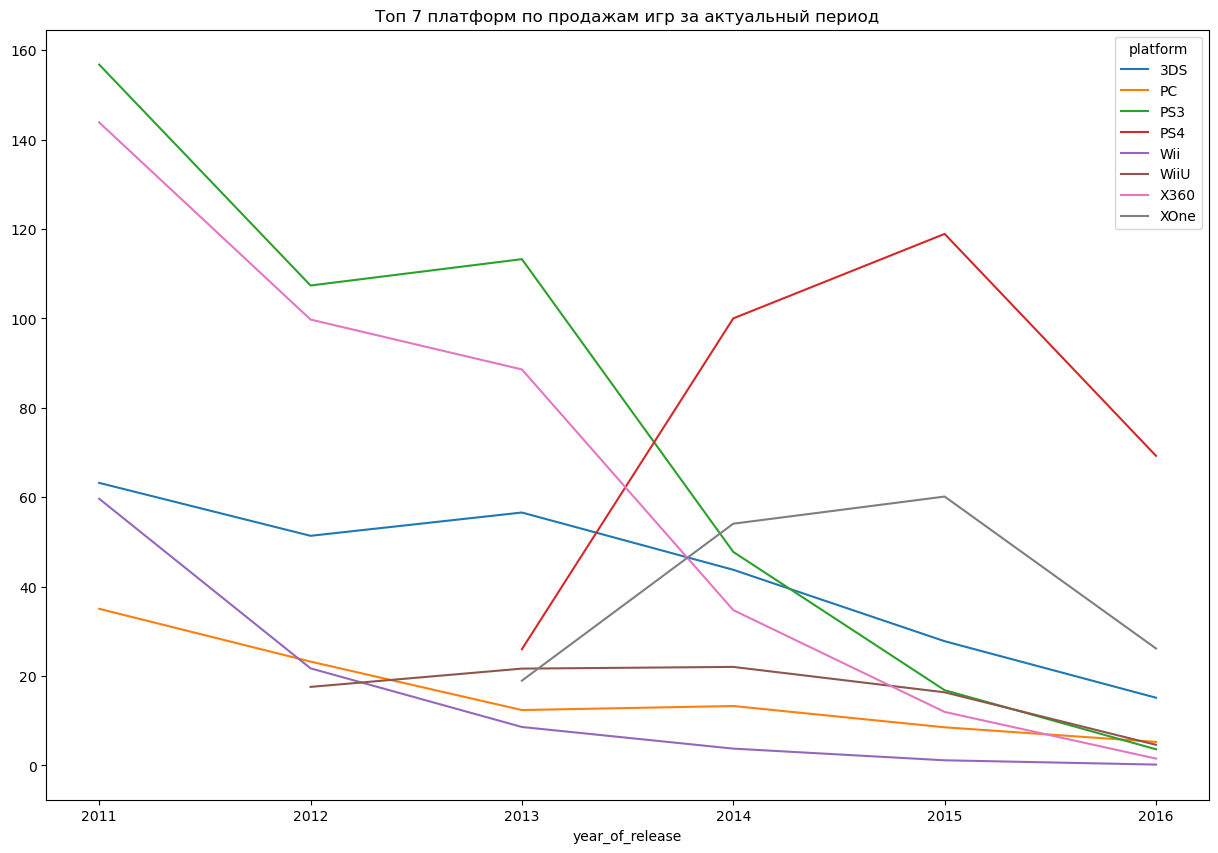

In [34]:
# Пристальнее изучим топовые платформы на графиках, чтобы выявить более и менее перспективные из них:

data_modern.loc[data_modern['platform'].isin(
    ['X360', 'PS3', 'PS4', 'XOne', '3DS', 'PC', 'Wii', 'WiiU']
                    )
               ].pivot_table(index='year_of_release', 
                            columns='platform', 
                            values='common_sales', 
                            aggfunc='sum'
                            ).\
plot(figsize=(15, 10), title='Топ 7 платформ по продажам игр за актуальный период')

Из графика видно, что платформы прошлого поколения быстрее теряют актуальность. Наиболее перспектывыми платформами в изучаемом периоде можно считать PS4, XBox One, 3DS,  и PC. Актуальность относительно свежего WiiU быстро стремится к нулевой отметке, пожтому записывать его в перспективные не стоит. Несмотя на относительно низкие продажи, PC выдержал проверку временем и уверенно держит планку продаж игр для него. 

Text(0.5, 1.0, 'Размах продаж по платформам')

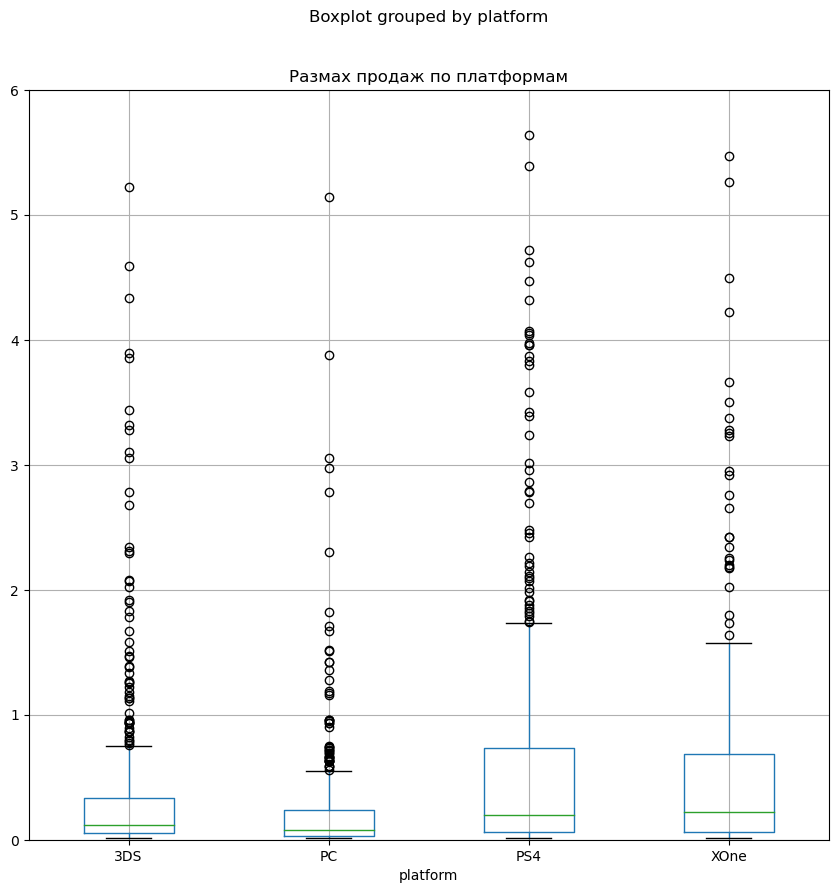

In [35]:
#Построим даиграмы размаха продаж для перспективных платформ:

data_modern.loc[data_modern['platform'].isin(
    ['PS4', 'XOne', '3DS', 'PC']
                    )
               ].boxplot(column='common_sales', by='platform', figsize=(10, 10))
plt.ylim(0, 6)
plt.title('Размах продаж по платформам')

In [36]:
# Посмотрим на данную диаграммму в цифрах: 

boxplot_table = data_modern.loc[data_modern['platform'].isin(
    ['PS4', 'XOne', '3DS', 'PC'
    ]
                    )
               ].pivot_table(
    index='platform',                             
    values='common_sales', 
    aggfunc=[
        'sum', 'mean', 'median', 'std', 'count'
    ]
)

In [37]:
boxplot_table.columns = ('sum', 'mean', 'median', 'std', 'count')

In [38]:
boxplot_table

,sum,mean,median,std,count
platform,,,,,
3DS,257.81,0.503535,0.12,1.441271,512
PC,97.68,0.251105,0.08,0.505710,389
PS4,314.14,0.801378,0.20,1.609456,392
XOne,159.32,0.645020,0.22,1.036139,247


Лидером по числу проданных копий игр является PS4, это видно как на диаграмме, так и в цифрах, так же она занимает первое место по среднему значению продаж. Наибольшее кол-вл наименований игр было продано на платформе 3DS. Наименьшее стандартное отклонение на PC, что положительно сказывается на прогнозируемости продаж.   

<AxesSubplot:title={'center':'Зависимость продаж игр рейтинга критиков на примере PS4'}, xlabel='critic_score', ylabel='common_sales'>

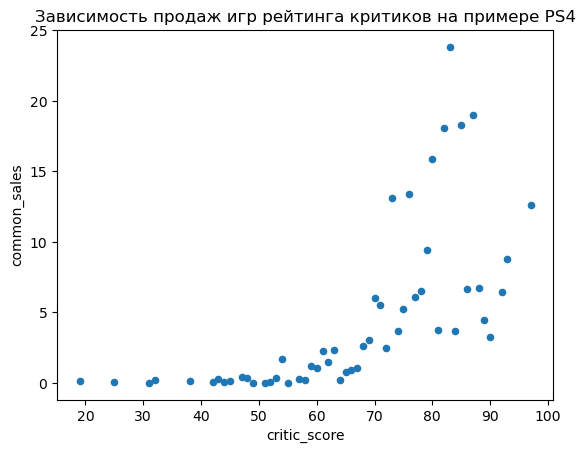

In [39]:
# Рассмотрим вляние рейтинга критиков на продажи на примере самой популярной платформы PS4: 

data.query('platform == "PS4"').pivot_table(
index='critic_score',
values='common_sales',
aggfunc='sum').reset_index().\
plot(kind='scatter', 
     x='critic_score', 
     y='common_sales', 
     title='Зависимость продаж игр рейтинга критиков на примере PS4'
    )


Судя по графику, мы не наблюдаем прямой зависимости от рейтинга критиков. Рассчитаем кореляцию, чтобы убедиться в этом: 

In [40]:
data.query('platform == "PS4"')['critic_score'].corr(data.query('platform == "PS4"')['common_sales'])

0.40656790206178095

Рассчеты это подтверждают, кореляция низкая.
Теперь проверим зависимость от рейтинга пользователей:

<AxesSubplot:title={'center':'Зависимость продаж игр рейтинга игроков на примере PS4'}, xlabel='user_score', ylabel='common_sales'>

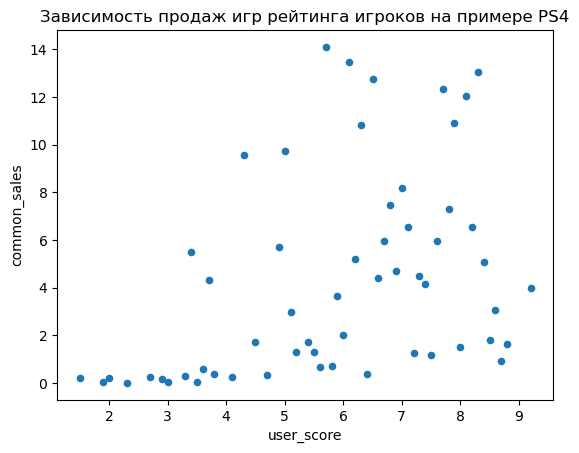

In [41]:
data.query('platform == "PS4"').pivot_table(
index='user_score',
values='common_sales',
aggfunc='sum').reset_index().\
plot(kind='scatter', 
     x='user_score', 
     y='common_sales', 
     title='Зависимость продаж игр рейтинга игроков на примере PS4'
    )

Ожидаемо, зависимость еще меньше, т.к. оценки пользователей могут быть самыми разными независмо от качества продукта. еще раз убедимся в этом рассчитав кореляцию:

In [42]:
data.query('platform == "PS4"')['user_score'].corr(data.query('platform == "PS4"')['common_sales'])

-0.031957110204556424

Кореляция еще ниже. 

Рассмотрим аналогичные зависимости на примере другой популярной платформы XBox One:

<AxesSubplot:title={'center':'Зависимость продаж игр рейтинга критиков на примере XBox One'}, xlabel='critic_score', ylabel='common_sales'>

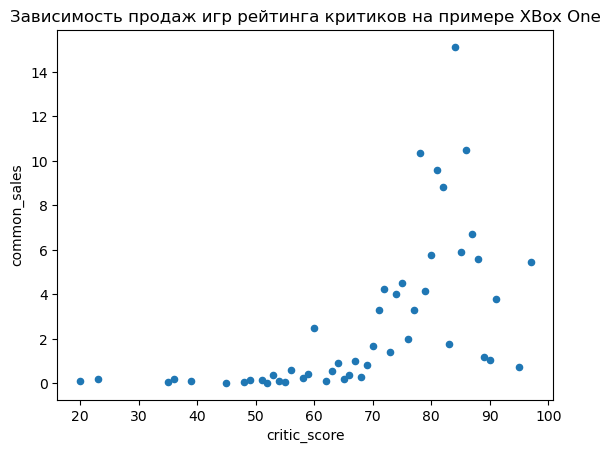

In [43]:
data.query('platform == "XOne"').pivot_table(
index='critic_score',
values='common_sales',
aggfunc='sum').reset_index().\
plot(kind='scatter', 
     x='critic_score', 
     y='common_sales', 
     title='Зависимость продаж игр рейтинга критиков на примере XBox One'
    )

In [44]:
data.query('platform == "XOne"')['critic_score'].corr(data.query('platform == "XOne"')['common_sales'])

0.4169983280084017

<AxesSubplot:title={'center':'Зависимость продаж игр рейтинга игроков на примере XBox One'}, xlabel='user_score', ylabel='common_sales'>

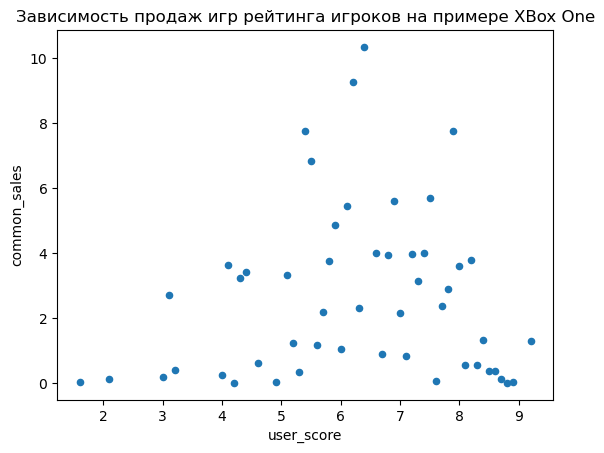

In [45]:
data.query('platform == "XOne"').pivot_table(
index='user_score',
values='common_sales',
aggfunc='sum').reset_index().\
plot(kind='scatter', 
     x='user_score', 
     y='common_sales', 
     title='Зависимость продаж игр рейтинга игроков на примере XBox One'
    )

In [46]:
data.query('platform == "XOne"')['user_score'].corr(data.query('platform == "XOne"')['common_sales'])

-0.0689250532827941

Ситуация c XBox One аналогичная: Есть небольшая зависимость от рейтинга критиков, однако на примере рейтинга игроков зависимость совсем изcчезает.

Таким образом, мы приходим к выводу, что онценка пользователей и критиков практически не влияют на кличество проданных копий игр.

<AxesSubplot:xlabel='common_sales', ylabel='genre'>

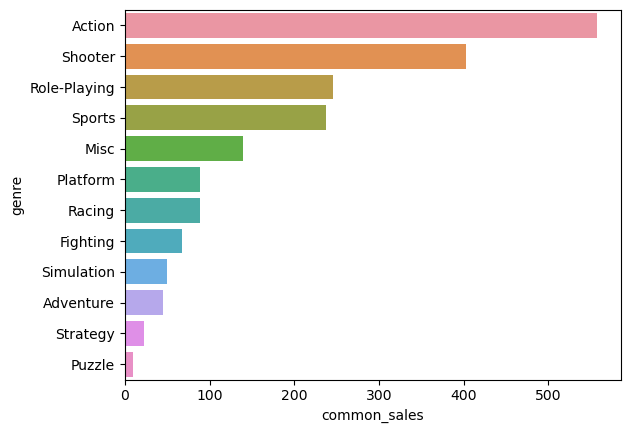

In [47]:
#Рассмотрим количество общих продаж по жанрам: 
sns.barplot(y='genre', 
            x='common_sales', 
            data=data_modern.groupby('genre')['common_sales'].sum().reset_index().sort_values(by='common_sales', ascending=False))

Самым популярным жанром является Action, однако рассмотрим данную зависимость в срезе медианных продаж и выбросов...

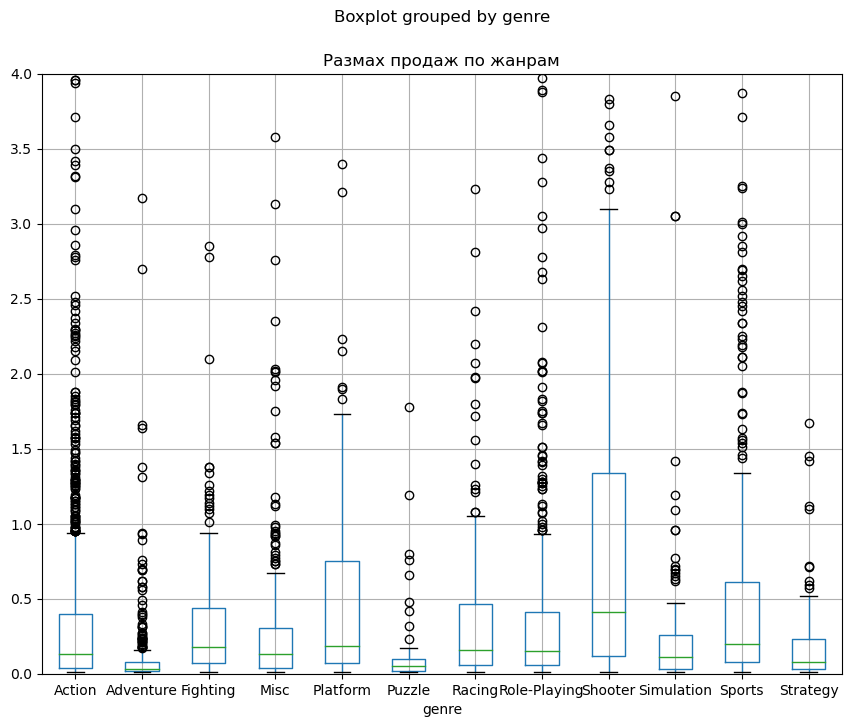

In [48]:

data_modern.boxplot(column='common_sales', by='genre', figsize=(10,8))
plt.title('Размах продаж по жанрам')
plt.ylim(0, 4)
plt.show()

In [49]:
genre_table = data_modern.pivot_table(index='genre', 
                        values='common_sales', 
                        aggfunc=['sum', 'mean', 'median', 'count', 'std']).\
sort_values(('median', 'common_sales'), ascending=False).reset_index()

In [50]:
genre_table.columns = ('genre', 'sum', 'mean', 'median', 'count', 'std')

In [51]:
genre_table

,genre,sum,mean,median,count,std
0,Shooter,402.91,1.224650,0.410,329,2.269889
1,Sports,237.15,0.609640,0.200,389,1.075213
2,Platform,88.68,0.726885,0.185,122,1.513836
3,Fighting,66.90,0.420755,0.180,159,0.814960
4,Racing,88.31,0.490611,0.160,180,1.212137
5,Role-Playing,245.63,0.528237,0.150,465,1.300689
6,Action,557.80,0.439559,0.130,1269,1.122831
7,Misc,139.42,0.371787,0.130,375,0.959781
8,Simulation,50.26,0.369559,0.110,136,1.018242
9,Strategy,22.16,0.189402,0.080,117,0.294619


В разрезе мидианных продаж количества выпущенных игр разных жанров картина меняется: наибольшее кол-вл продаваемых копий одной игры призодится на жанр Shooter. Жанр Action расположился аж на 7 месте. Теперь станвится ясно, что предыдущем графике жанр Action вырвался вперед за счет огромного количества выпущенных в этом жанре игр, однако их продажи далеко не всегда были многочисленны.

В топе оказались активные жанры, такие как экшен, шутер, спорт. На последних метсах расположились жанры пазл и стратегии. Любопытно, что первые позиции превосходят последние по продажам в десятки раз.  

<AxesSubplot:title={'center':'Топ 5 платформ Японии'}, xlabel='platform'>

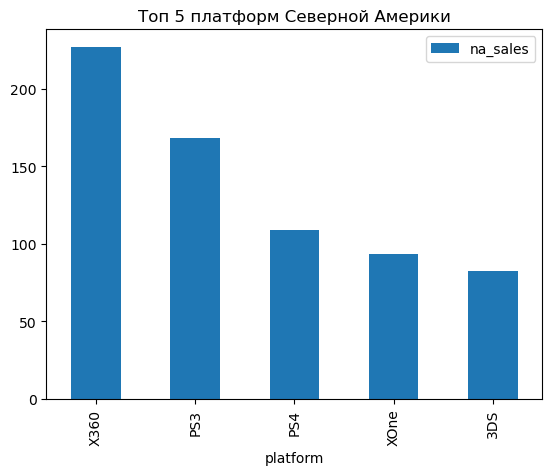

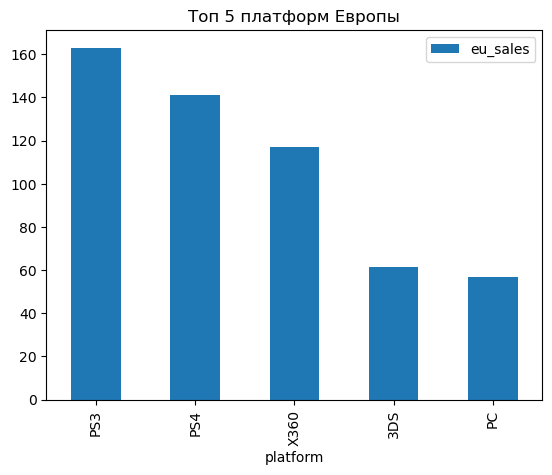

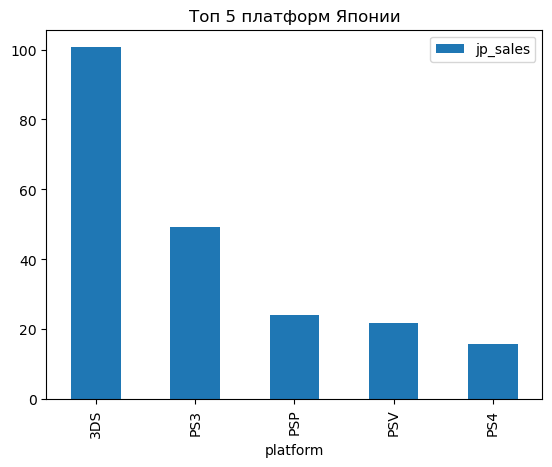

In [52]:
# Найдем самые популярные платформы (Топ 5) для Северной Америки, Европы и Японии:
data_modern.pivot_table(index='platform', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False).head(5).\
plot(kind='bar', title='Топ 5 платформ Северной Америки')

data_modern.pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False).head(5).\
plot(kind='bar', title='Топ 5 платформ Европы')

data_modern.pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False).head(5).\
plot(kind='bar', title='Топ 5 платформ Японии')

В Северной Америке традиционно выбирают продукт Microsoft XBox, В Европе предпочтение отдано японской платворме PS4, я в Японии предпочитают портативные устройства, поэтому лидирует 3DS.

In [53]:
# Посчитаем долю продаж игр по каждому региону:
print('Доля Северной Америки:', '{:%}'.format(data_modern['na_sales'].sum() / data_modern['common_sales'].sum()))
print('Доля Европы:', '{:%}'.format(data_modern['eu_sales'].sum() / data_modern['common_sales'].sum()))
print('Доля Японии:', '{:%}'.format(data_modern['jp_sales'].sum() / data_modern['common_sales'].sum()))


Доля Северной Америки: 42.462297%
Доля Европы: 34.275962%
Доля Японии: 12.570940%


Северная Америка охватывает почти половину всех продаж. 

<AxesSubplot:title={'center':'Топ 5 жанров Японии'}, xlabel='genre'>

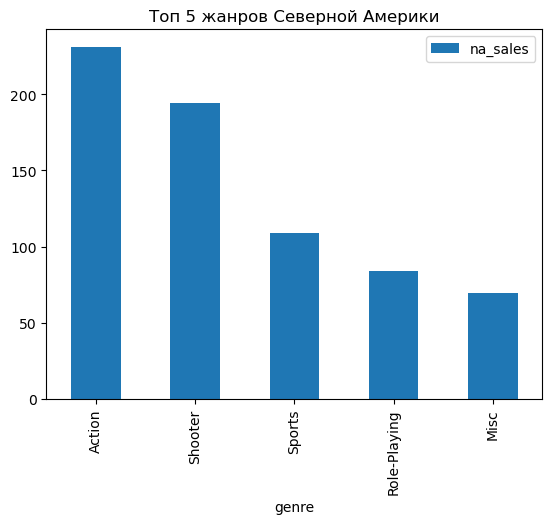

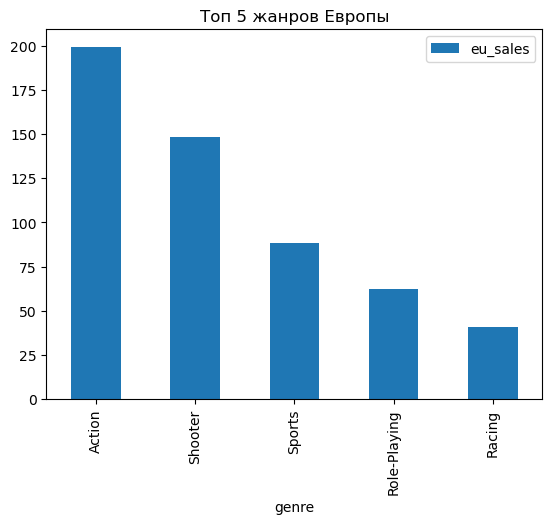

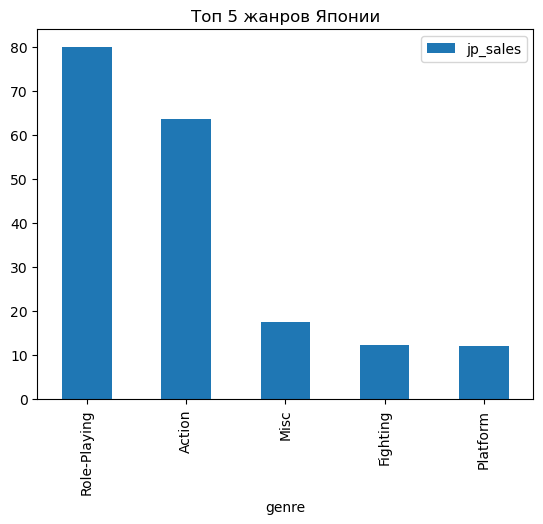

In [54]:
# Самые популярные жанры (Топ 5) для регионов: 

data_modern.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', title='Топ 5 жанров Северной Америки')

data_modern.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title='Топ 5 жанров Европы')

data_modern.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title='Топ 5 жанров Японии')



Из графиков видно, что в Северной Америке и Европе лидирует жанр Экшен, а в Японии - ролевые игры. 

Изучим зависимость продаж от рейтинга в регионах: 

In [55]:
data_modern.pivot_table(
    index = 'rating',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
)

,eu_sales,jp_sales,na_sales
rating,,,
E,141.73,36.68,170.17
E10+,78.00,11.23,117.72
EC,0.00,0.00,0.42
M,250.26,26.14,308.45
RP,0.03,0.00,0.00
T,83.16,33.39,109.31
no_rating,116.61,138.21,123.69


<AxesSubplot:title={'center':'Продажи по рейтингу в Японии'}, xlabel='rating'>

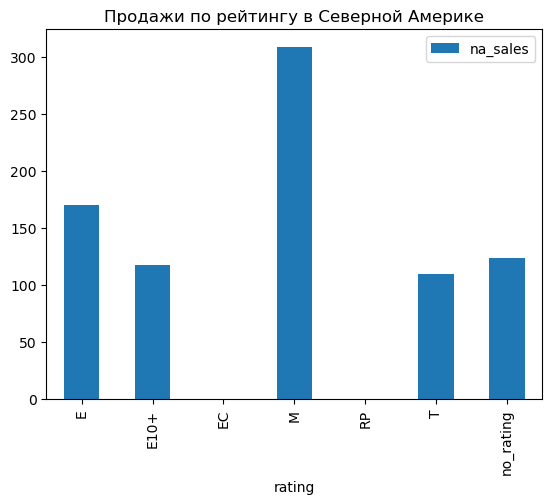

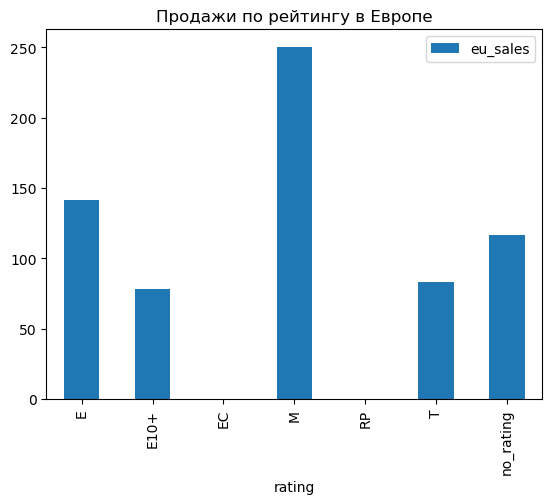

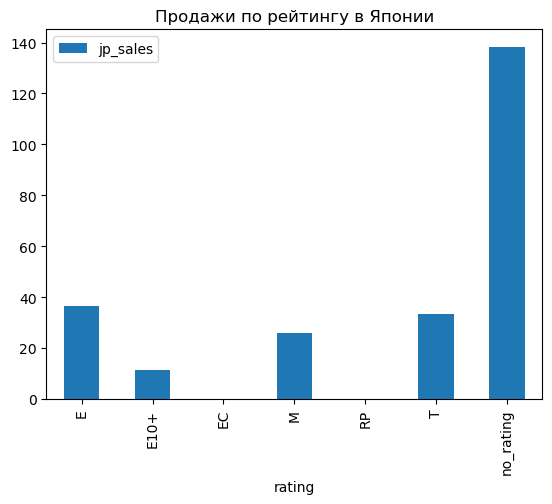

In [56]:
data_modern.pivot_table(
    index = 'rating',
    values = 'na_sales',
    aggfunc =  'sum'
).plot(kind='bar', title = 'Продажи по рейтингу в Северной Америке')

data_modern.pivot_table(
    index = 'rating',
    values = 'eu_sales',
    aggfunc =  'sum'
).plot(kind='bar', title = 'Продажи по рейтингу в Европе')

data_modern.pivot_table(
    index = 'rating',
    values = 'jp_sales',
    aggfunc =  'sum'
).plot(kind='bar', title = 'Продажи по рейтингу в Японии')

Мы можем наблюдать сходство в зависмости рейтинга от продаж в Европе и Северной Америке: Большинство игр продается с рейтингом 'М'. В Японии же картина иная: большинство игр не имеют рейтинга, можно предположить, что основной класификацией по возрасту в Японии является не ESRB, а другая методика оценки. 

**Вывод** Атуальным для исследования был выбран период с 2011 по 2016, это связано со сменяемостью актуальных платформ (около 10лет). Было выялено, что количтво проданных игр может сильно меняться в зависимости от платформы, региона и жанра. Прямой зависимости продаж от отценок пользоваателей и критиков выявлено не было.    

**ПРОВЕРКА ГИПОТЕЗ**

Гипотеза №1: 

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [57]:
# создадим датафреймы согласно гипотезе и избавимся от пропусков в оценках пользователей:

data_pc = data_modern.query('platform == "PC"').user_score.dropna().reset_index(drop=True)

data_xbox = data_modern.query('platform == "XOne"').user_score.dropna().reset_index(drop=True)


In [58]:
# Проверим гипотезу:

alpha = 0.05  
# Для проверки используем гипотезу о равентве двух средних генеральных совокупностей, т.к. совкупности независимы друг от друга. 
# Будучи неуверенными в равентсве дисперсий представленных совокупностей используем параметр equal_var = False
results = st.ttest_ind(data_pc, data_xbox, equal_var=False) 


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


Гипотеза №2: 

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Выполним действия по аналогии с гипотезой №1:

In [59]:
data_action = data_modern.query('genre == "Action"').user_score.dropna().reset_index(drop=True)

data_sports = data_modern.query('genre == "Sports"').user_score.dropna().reset_index(drop=True)

In [60]:
alpha = .05

results = st.ttest_ind(data_action, data_sports, equal_var=False)

print('p-значение: ', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.285648549432565e-19
Отвергаем нулевую гипотезу


**ИТОГИ РАБОТЫ:** 

По пердоставленным данным была проделана следующая работа: 

1) Предобработка данных:
- выяввлены и по возможности устранены пропуски в столбцах: оценки критиков, оценки пользователей, рейтинг, название игры, жанр
- проведен поиск дубликатов
- замена устаревших обозначений в стобце с рейтингом
- приведены к корректному типу данных столбцы с оценками пользователей и даты релиза 

2) В результате исследовательского анализа данных были выявлены следующие зависимости: 
- средний срок жизни игровых платворм (за исключением PC) составляет 10лет. 
- актуальными игровыми платформами на конец изучаемого периода считаются: PS4, XBox One, 3DS, PC. В меньшей степени можно выделить: PS3, XBox 360, т.к. платформы устаревшие.
- самыми популярними жанрами являются Action, shooter, Role-playing, Spotrs, Misc.
- нельзя не отметить что предпочтения игроков в зависимости от регионов разнятся: 
      - В Северной Америке самая популярная платформа - XBox 360; самый популярний жанр - Action
      - В Европе - PS3, Action
      - В Японии - 3DS, Role-playing
- необходимо учитывать возрастной рейтинг: в Северной Америке и Европе активно используется рейтинг  ESRB. Самые продаваемые игры имеют рейтинг 'М' и 'Е' в обоих регионах. В Японии большинство игр не маркоровано данным рейтингом, там используется другая рейтинговая система.
- самый оборачиваемый - рынок Северной америки с долей 42%, на втором месте расположился рынок Европы - 34% и рынок Японии с долей 13% 

3) Были сформулированы и проверены две гипотезы: 
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Первая гипотеза оказалась верной, вторая - нет. 